#### Import File

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem

In [2]:
mols = pd.read_excel('ref&exp_HAAFP.xlsx', header=0)

In [3]:
mols.head()

,SMILE,DCAA,TCAA,HAAFP
"2,4,6-Trichlorophenol",Oc1c(Cl)cc(Cl)cc1Cl,7.259190,223.270502,230.529692
2-chlorophenol,Oc1ccccc1Cl,6.812471,191.809058,198.621528
4-chlorophenol,Oc1ccc(Cl)cc1,6.533271,193.571603,200.104875
Phenol,Oc1ccccc1,6.700791,177.003672,183.704463
4'-Hydroxyacetanilide,CC(=O)Nc1ccc(O)cc1,17.049791,77.199510,94.249301


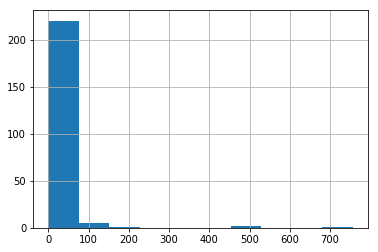

In [4]:
mols['DCAA'].hist()

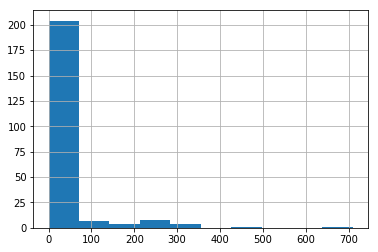

In [5]:
mols['TCAA'].hist()

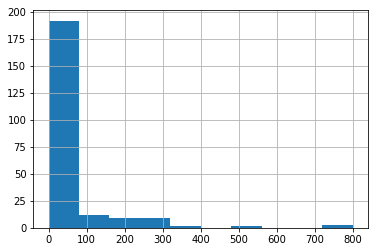

In [6]:
mols['HAAFP'].hist()

In [7]:
mols

,SMILE,DCAA,TCAA,HAAFP
"2,4,6-Trichlorophenol",Oc1c(Cl)cc(Cl)cc1Cl,7.259190,223.270502,230.529692
2-chlorophenol,Oc1ccccc1Cl,6.812471,191.809058,198.621528
4-chlorophenol,Oc1ccc(Cl)cc1,6.533271,193.571603,200.104875
Phenol,Oc1ccccc1,6.700791,177.003672,183.704463
4'-Hydroxyacetanilide,CC(=O)Nc1ccc(O)cc1,17.049791,77.199510,94.249301
4-tert-butylphenol,CC(C)(C)c1ccc(O)cc1,5.677059,105.018360,110.695419
4-chloro-3-methylphenol,Cc1cc(O)ccc1Cl,8.655188,40.714810,49.369999
3-aminophenol,Nc1cccc(O)c1,17.254537,31.197062,48.451599
"2,4-dinitrophenol",Oc1ccc(cc1[N+]([O-])=O)[N+]([O-])=O,3.517915,16.303550,19.821465
"2,6-xylenol",Cc1cccc(C)c1O,10.721266,0.822521,11.543787


#### Build structure from SMILE

In [8]:
smile_list = mols['SMILE'].values.tolist()
mol_list = [Chem.MolFromSmiles(smile) for smile in smile_list]

In [9]:
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [10]:
_ = [AllChem.Compute2DCoords(mol) for mol in mol_list]

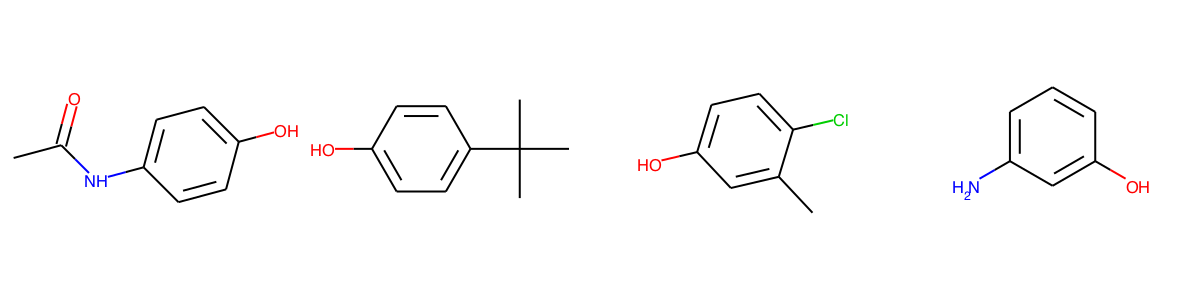

In [11]:
Draw.MolsToGridImage(mol_list[4:8], molsPerRow=4, subImgSize=(300,300))

In [12]:
from mordred import Calculator, descriptors

In [13]:
calc = Calculator(descriptors, ignore_3D = False)
qsar_preview = pd.DataFrame(calc.pandas(mol_list))

100%|██████████| 229/229 [00:10<00:00, 22.65it/s]


In [14]:
qsar_preview.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,7.427747,7.188678,0,0,11.6431,2.30725,4.6145,11.6431,1.16431,3.20636,...,9.078065,39.748909,195.924948,15.071150,110,13,48.0,54.0,4.94444,2.222222
1,5.835194,5.606207,0,0,9.95396,2.19353,4.38705,9.95396,1.24424,2.98024,...,8.555837,35.908899,128.002892,9.846376,60,8,36.0,39.0,3.22222,1.861111
2,5.875634,5.525875,0,0,9.92478,2.17009,4.34017,9.92478,1.2406,2.97973,...,8.463159,35.730685,128.002892,9.846376,62,7,36.0,38.0,3.22222,1.833333
3,5.059137,4.785854,0,0,8.72057,2.101,4.20201,8.72057,1.2458,2.8443,...,8.124151,33.544698,94.041865,7.233990,42,5,30.0,31.0,2.36111,1.666667
4,8.106344,7.427049,0,0,13.2218,2.21994,4.43987,13.2218,1.20198,3.28596,...,8.795279,40.344003,151.063329,7.553166,166,11,50.0,53.0,4.58333,2.500000


In [15]:
qsar_preview.describe(include='all')

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.0,229.000000,229.000000,229.000000,229.000000,...,229.000000,229.000000,229.000000,229.000000,2.290000e+02,229.000000,229.000000,229.000000,229.000000,229.000000
unique,NaN,NaN,NaN,NaN,130.000000,126.0,126.000000,129.000000,129.000000,132.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,NaN
top,NaN,NaN,NaN,NaN,4.472136,2.0,3.236068,4.472136,1.118034,2.155909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.222222,NaN
freq,NaN,NaN,NaN,NaN,10.000000,11.0,10.000000,10.000000,10.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN
mean,6.269540,6.156855,0.323144,0.244541,NaN,NaN,NaN,NaN,NaN,NaN,...,8.158154,37.932262,135.418244,8.118988,4.366937e+06,8.794760,38.200873,40.545852,NaN,2.137130
std,2.720191,2.595628,0.649181,0.656632,NaN,NaN,NaN,NaN,NaN,NaN,...,1.072597,8.615933,56.400217,2.922905,6.608186e+07,7.186535,19.083698,23.269094,NaN,0.729901
min,1.414214,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,4.174387,17.310771,41.026549,4.596384,3.000000e+00,0.000000,6.000000,4.000000,NaN,0.750000
25%,4.352030,4.429961,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,7.627057,33.372552,100.052429,6.503913,3.500000e+01,4.000000,24.000000,24.000000,NaN,1.611111
50%,6.163363,6.191587,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,8.308692,37.548073,124.052429,7.336333,8.400000e+01,8.000000,36.000000,38.000000,NaN,2.027778
75%,7.806684,7.585047,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,8.857230,42.293137,155.069477,8.627683,1.500000e+02,11.000000,48.000000,53.000000,NaN,2.527778


Drop Missing Values and Build Dataset

In [16]:
qsar_features = []
for mol in mol_list:
    qsar_features.append(np.array(calc(mol).fill_missing()[:]))
    
qsar_features = np.vstack(qsar_features)

In [17]:
qsar_features.shape

(229, 2163)

In [18]:
df_qsar = pd.DataFrame(qsar_features, columns = qsar_preview.columns).dropna(axis=1)
df_qsar.describe()

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0,229.0,...,229.000000,229.000000,229.000000,229.000000,229.000000,2.290000e+02,229.000000,229.000000,229.000000,229.000000
mean,6.269540,6.156855,0.323144,0.244541,2.672489,2.689956,17.231441,8.917031,0.0,0.0,...,0.922895,8.158154,37.932262,135.418244,8.118988,4.366937e+06,8.794760,38.200873,40.545852,2.137130
std,2.720191,2.595628,0.649181,0.656632,3.228462,3.267991,6.048319,3.470062,0.0,0.0,...,2.302001,1.072597,8.615933,56.400217,2.922905,6.608186e+07,7.186535,19.083698,23.269094,0.729901
min,1.414214,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.0,0.0,...,0.000000,4.174387,17.310771,41.026549,4.596384,3.000000e+00,0.000000,6.000000,4.000000,0.750000
25%,4.352030,4.429961,0.000000,0.000000,0.000000,0.000000,13.000000,6.000000,0.0,0.0,...,0.000000,7.627057,33.372552,100.052429,6.503913,3.500000e+01,4.000000,24.000000,24.000000,1.611111
50%,6.163363,6.191587,0.000000,0.000000,0.000000,0.000000,16.000000,9.000000,0.0,0.0,...,0.000000,8.308692,37.548073,124.052429,7.336333,8.400000e+01,8.000000,36.000000,38.000000,2.027778
75%,7.806684,7.585047,0.000000,0.000000,6.000000,6.000000,21.000000,11.000000,0.0,0.0,...,0.000000,8.857230,42.293137,155.069477,8.627683,1.500000e+02,11.000000,48.000000,53.000000,2.527778
max,22.219488,22.990790,4.000000,5.000000,12.000000,12.000000,40.000000,29.000000,0.0,0.0,...,7.239215,11.040310,66.231424,499.937495,27.312568,1.000000e+09,72.000000,164.000000,208.000000,5.500000


In [19]:
df_result = mols[['DCAA', 'TCAA', 'HAAFP']]
df_result.head()

,DCAA,TCAA,HAAFP
"2,4,6-Trichlorophenol",7.259190,223.270502,230.529692
2-chlorophenol,6.812471,191.809058,198.621528
4-chlorophenol,6.533271,193.571603,200.104875
Phenol,6.700791,177.003672,183.704463
4'-Hydroxyacetanilide,17.049791,77.199510,94.249301


In [20]:
X = df_qsar.values
y = df_result.values

### Visualization by t-SNE 

To reduce feature space to 3 dimensions

In [21]:
names = [str(mols.index[i]) for i in range(len(mols))]

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_X = tsne.fit_transform(X)

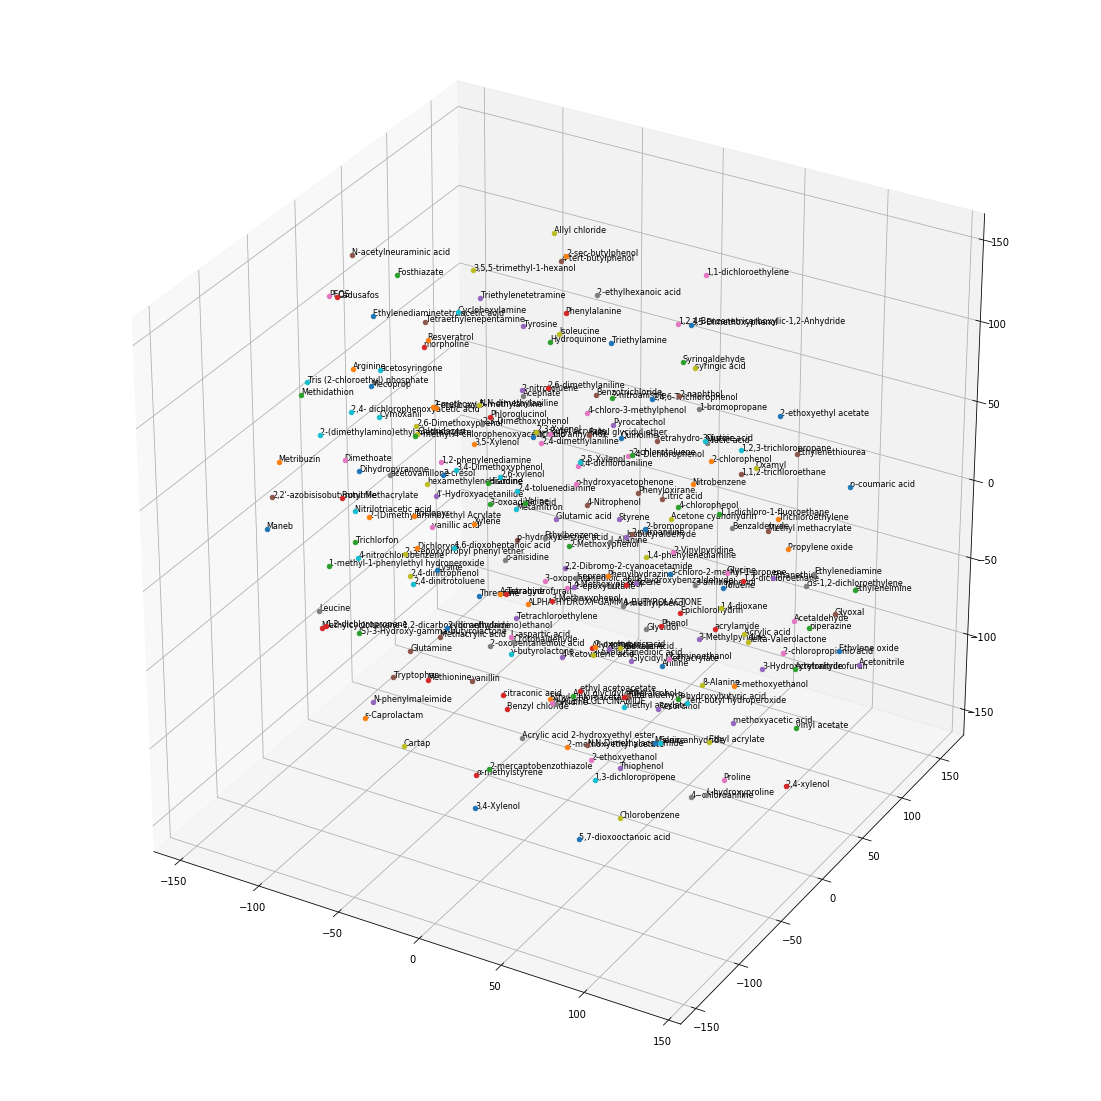

In [23]:
fig = plt.figure(figsize = (15, 15))
ax = Axes3D(fig)

x_max, x_min = max(tsne_X[:,0]), min(tsne_X[:,0])
y_max, y_min = max(tsne_X[:,1]), min(tsne_X[:,1])
z_max, z_min = max(tsne_X[:,2]), min(tsne_X[:,2])
margin = 0.1

for idx in range(len(tsne_X)):
    ax.scatter(tsne_X[idx,0], tsne_X[idx,1], tsne_X[idx,2])
    ax.text(tsne_X[idx,0], tsne_X[idx,1], tsne_X[idx,2], names[idx], size=8, zorder=1, color='k')     
    
ax.set_xlim(x_min - margin, x_max + margin)
ax.set_ylim(y_min - margin, y_max + margin)
ax.set_zlim(z_min - margin, z_max + margin)

plt.show()

### Apply machine learning models

##### Preprocess

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
log_y = np.log1p(np.log1p(y))

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size = 0.2)

([array([47., 45., 44., 14., 12., 17., 22., 18.,  6.,  4.]),
  array([100.,  32.,  17.,  15.,   6.,   5.,  12.,  16.,  10.,  16.]),
  array([36., 36., 36., 25., 14., 13., 14., 15., 19., 21.])],
 array([0.        , 0.20394063, 0.40788127, 0.6118219 , 0.81576253,
        1.01970317, 1.2236438 , 1.42758443, 1.63152507, 1.8354657 ,
        2.03940633]),
 <a list of 3 Lists of Patches objects>)

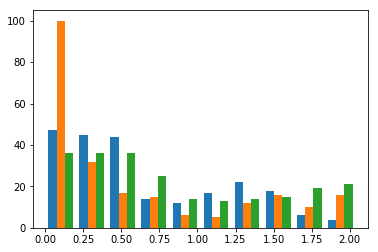

In [328]:
plt.hist(log_y)

##### Scale & Support Vector Regression

In [329]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [384]:
scaler = StandardScaler().fit(X_train)

DCAA_regressor = svm.SVR(C=1e3, kernel='rbf', epsilon=0.05, tol=1e-3)
DCAA_regressor.fit(scaler.transform(X_train), y_train[:,0])

TCAA_regressor = svm.SVR(C=1e5, kernel='rbf', epsilon=0.15, tol=1e-3)
TCAA_regressor.fit(scaler.transform(X_train), y_train[:,1])

HAAFP_regressor = svm.SVR(C=1e4, kernel='rbf', epsilon=0.25, tol=1e-2)
HAAFP_regressor.fit(scaler.transform(X_train), y_train[:,2])

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.25,
  gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.01,
  verbose=False)

In [385]:
y_pred_DCAA = DCAA_regressor.predict(scaler.transform(X_test))
y_pred_TCAA = TCAA_regressor.predict(scaler.transform(X_test))
y_pred_HAAFP = HAAFP_regressor.predict(scaler.transform(X_test))

#### Mean Absolute Error on testset (DCAA, TCAA and HAAFP):

In [386]:
[mean_absolute_error(np.expm1(np.expm1(y_test[:,0])), np.expm1(np.expm1(y_pred_DCAA))),
 mean_absolute_error(np.expm1(np.expm1(y_test[:,1])), np.expm1(np.expm1(y_pred_TCAA))),
 mean_absolute_error(np.expm1(np.expm1(y_test[:,2])), np.expm1(np.expm1(y_pred_HAAFP)))]

[4.629592046677931, 16.65989252757809, 22.833657456149584]

#### Mean values of DCAA, TCAA and HAAFP on whole dataset:

In [387]:
[np.mean(np.expm1(np.expm1(log_y[:,0]))),
 np.mean(np.expm1(np.expm1(log_y[:,1]))),
 np.mean(np.expm1(np.expm1(log_y[:,2])))]

[16.25525648643329, 30.154173949052524, 47.928354598707195]

#### Figure:

- Uncomment *** plt.savefig("Regression_result.png")*** to save image.

- The training biases in TCAA and HAAFP are caused by epsilon. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value. A larger epsilon leads to higher biases on training set but less error on test set (to trade-off overfitting).

- The performance of svr model will vary according to how we split the dataset. The more diversity in training set, the better performance the model will achieve.

- On the whole, SVR model usually obtains better performance on PCAA.

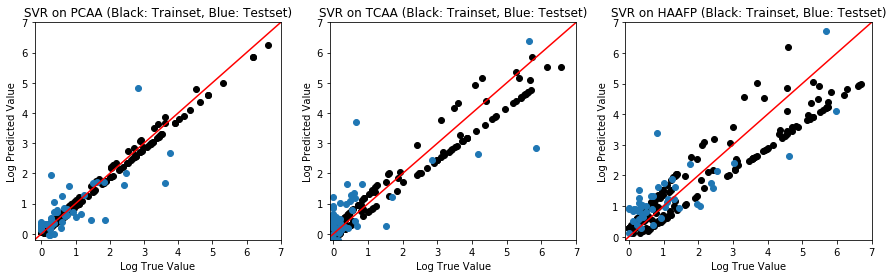

In [388]:
plt.figure(figsize = (15, 4))
p1 = plt.subplot(131)
p1.axis([-.2, 7, -.2, 7])
p1.scatter(np.expm1(y_train[:,0]), np.expm1(DCAA_regressor.predict(scaler.transform(X_train))), color='black')
p1.scatter(np.expm1(y_test[:,0]), np.expm1(y_pred_DCAA))
p1.plot([-1, 7], [-1, 7], color='r')
p1.set_title('SVR on PCAA (Black: Trainset, Blue: Testset)')
p1.set_xlabel('Log True Value')
p1.set_ylabel('Log Predicted Value')

p2 = plt.subplot(132)
p2.axis([-.1, 7, -.2, 7])
p2.scatter(np.expm1(y_train[:,1]), np.expm1(TCAA_regressor.predict(scaler.transform(X_train))), color='black')
p2.scatter(np.expm1(y_test[:,1]), np.expm1(y_pred_TCAA))
p2.plot([-1, 7], [-1, 7], color='r')
p2.set_title('SVR on TCAA (Black: Trainset, Blue: Testset)')
p2.set_xlabel('Log True Value')
p2.set_ylabel('Log Predicted Value')

p3 = plt.subplot(133)
p3.axis([-.1, 7, -.1, 7])
p3.scatter(np.expm1(y_train[:,2]), np.expm1(HAAFP_regressor.predict(scaler.transform(X_train))), color='black')
p3.scatter(np.expm1(y_test[:,2]), np.expm1(y_pred_HAAFP))
p3.plot([-1, 7], [-1, 7], color='r')
p3.set_title('SVR on HAAFP (Black: Trainset, Blue: Testset)')
p3.set_xlabel('Log True Value')
p3.set_ylabel('Log Predicted Value')

# plt.savefig("Regression_result.png")
plt.show()

##### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
DCAA_regressor = RandomForestRegressor(n_estimators = 60, max_features = int(len(X_train)))
DCAA_regressor.fit(X_train, y_train[:,0])

TCAA_regressor = RandomForestRegressor(n_estimators = 60, max_features = int(len(X_train)))
TCAA_regressor.fit(X_train, y_train[:,1])

HAAFP_regressor = RandomForestRegressor(n_estimators = 60, max_features = int(len(X_train)))
HAAFP_regressor.fit(X_train, y_train[:,2])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=183, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
y_pred_DCAA = DCAA_regressor.predict(X_test)
y_pred_TCAA = TCAA_regressor.predict(X_test)
y_pred_HAAFP = HAAFP_regressor.predict(X_test)

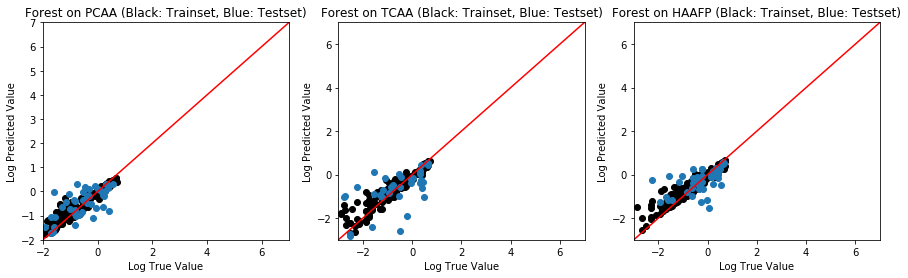

In [35]:
plt.figure(figsize = (15, 4))
p1 = plt.subplot(131)
p1.axis([-2, 7, -2, 7])
p1.scatter(np.log(y_train[:,0]+1e-4), np.log(DCAA_regressor.predict(X_train)+1e-4), color='black')
p1.scatter(np.log(y_test[:,0]+1e-4), np.log(y_pred_DCAA+1e-4))
p1.plot([-2, 7], [-2, 7], color='r')
p1.set_title('Forest on PCAA (Black: Trainset, Blue: Testset)')
p1.set_xlabel('Log True Value')
p1.set_ylabel('Log Predicted Value')

p2 = plt.subplot(132)
p2.axis([-3, 7, -3, 7])
p2.scatter(np.log(y_train[:,1]+1e-4), np.log(TCAA_regressor.predict(X_train)+1e-4), color='black')
p2.scatter(np.log(y_test[:,1]+1e-4), np.log(y_pred_TCAA+1e-4))
p2.plot([-3, 7], [-3, 7], color='r')
p2.set_title('Forest on TCAA (Black: Trainset, Blue: Testset)')
p2.set_xlabel('Log True Value')
p2.set_ylabel('Log Predicted Value')

p3 = plt.subplot(133)
p3.axis([-3, 7, -3, 7])
p3.scatter(np.log(y_train[:,2]+1e-4), np.log(HAAFP_regressor.predict(X_train)+1e-4), color='black')
p3.scatter(np.log(y_test[:,2]+1e-4), np.log(y_pred_HAAFP+1e-4))
p3.plot([-3, 7], [-3, 7], color='r')
p3.set_title('Forest on HAAFP (Black: Trainset, Blue: Testset)')
p3.set_xlabel('Log True Value')
p3.set_ylabel('Log Predicted Value')

plt.show()

##### PCA+KNN

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train)
sum(pca.explained_variance_ratio_)

0.9834565458472411

In [38]:
pca.explained_variance_ratio_

array([0.79326506, 0.07561529, 0.04607696, 0.02147241, 0.01553634,
       0.01165118, 0.00621742, 0.0054702 , 0.00425736, 0.00389432])

It seems that qsar features have too strong correlationship and serious redundancy.

Correlation Matrix

In [39]:
df_qsar.corr()

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
ABC,1.000000,0.985391,0.300832,0.041486,0.410091,0.410351,0.812095,0.991991,NaN,NaN,...,0.014865,0.844859,0.770274,0.894611,0.106233,0.012982,0.947102,0.994306,0.979926,0.955559
ABCGG,0.985391,1.000000,0.338773,0.048607,0.310018,0.309864,0.817658,0.990630,NaN,NaN,...,-0.030243,0.820925,0.730264,0.915836,0.129301,0.014557,0.950696,0.977361,0.960469,0.962325
nAcid,0.300832,0.338773,1.000000,0.245950,-0.233887,-0.231663,0.231084,0.335153,NaN,NaN,...,-0.085309,0.167242,0.164513,0.306544,0.065792,0.171441,0.221103,0.257426,0.213583,0.321574
nBase,0.041486,0.048607,0.245950,1.000000,-0.255844,-0.252704,0.307054,0.084014,NaN,NaN,...,-0.056622,-0.088552,-0.021420,0.049944,-0.214499,-0.024718,-0.028354,-0.006737,-0.041212,0.141220
nAromAtom,0.410091,0.310018,-0.233887,-0.255844,1.000000,0.999257,0.165171,0.334646,NaN,NaN,...,-0.098130,0.534928,0.290198,0.174362,-0.014064,-0.054942,0.362501,0.435319,0.457022,0.277702
nAromBond,0.410351,0.309864,-0.231663,-0.252704,0.999257,1.000000,0.165187,0.334594,NaN,NaN,...,-0.091151,0.533745,0.293609,0.174692,-0.013256,-0.054632,0.362192,0.435764,0.457655,0.277471
nAtom,0.812095,0.817658,0.231084,0.307054,0.165171,0.165187,1.000000,0.843086,NaN,NaN,...,-0.053260,0.656868,0.600216,0.717617,-0.254729,-0.002538,0.711365,0.773096,0.733256,0.879227
nHeavyAtom,0.991991,0.990630,0.335153,0.084014,0.334646,0.334594,0.843086,1.000000,NaN,NaN,...,-0.039191,0.804274,0.727317,0.918261,0.109171,0.039843,0.941134,0.977831,0.956679,0.981796
nSpiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nBridgehead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
DCAA_regressor = KNeighborsRegressor(n_neighbors=3)
DCAA_regressor.fit(X_train, y_train[:,0])

TCAA_regressor = KNeighborsRegressor(n_neighbors=3)
TCAA_regressor.fit(X_train, y_train[:,1])

HAAFP_regressor = KNeighborsRegressor(n_neighbors=3)
HAAFP_regressor.fit(X_train, y_train[:,2])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [42]:
y_pred_DCAA = DCAA_regressor.predict(X_test)
y_pred_TCAA = TCAA_regressor.predict(X_test)
y_pred_HAAFP = HAAFP_regressor.predict(X_test)

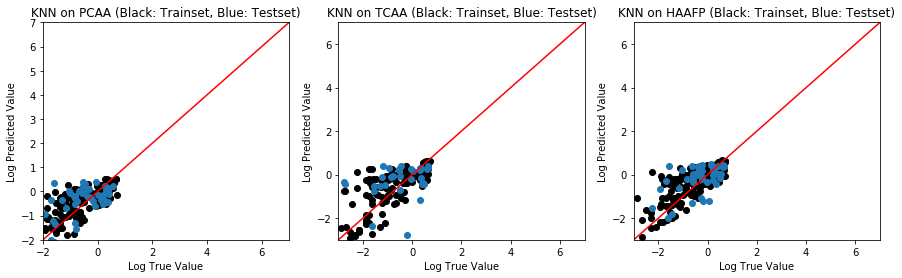

In [43]:
plt.figure(figsize = (15, 4))
p1 = plt.subplot(131)
p1.axis([-2, 7, -2, 7])
p1.scatter(np.log(y_train[:,0]+1e-4), np.log(DCAA_regressor.predict(X_train)+1e-4), color='black')
p1.scatter(np.log(y_test[:,0]+1e-4), np.log(y_pred_DCAA+1e-4))
p1.plot([-2, 7], [-2, 7], color='r')
p1.set_title('KNN on PCAA (Black: Trainset, Blue: Testset)')
p1.set_xlabel('Log True Value')
p1.set_ylabel('Log Predicted Value')

p2 = plt.subplot(132)
p2.axis([-3, 7, -3, 7])
p2.scatter(np.log(y_train[:,1]+1e-4), np.log(TCAA_regressor.predict(X_train)+1e-4), color='black')
p2.scatter(np.log(y_test[:,1]+1e-4), np.log(y_pred_TCAA+1e-4))
p2.plot([-3, 7], [-3, 7], color='r')
p2.set_title('KNN on TCAA (Black: Trainset, Blue: Testset)')
p2.set_xlabel('Log True Value')
p2.set_ylabel('Log Predicted Value')

p3 = plt.subplot(133)
p3.axis([-3, 7, -3, 7])
p3.scatter(np.log(y_train[:,2]+1e-4), np.log(HAAFP_regressor.predict(X_train)+1e-4), color='black')
p3.scatter(np.log(y_test[:,2]+1e-4), np.log(y_pred_HAAFP+1e-4))
p3.plot([-3, 7], [-3, 7], color='r')
p3.set_title('KNN on HAAFP (Black: Trainset, Blue: Testset)')
p3.set_xlabel('Log True Value')
p3.set_ylabel('Log Predicted Value')

plt.show()